In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils.cifar_utils import load_data

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Applications/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Applications/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Applications/anaconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Applications/anaconda3/envs/envTF113

## Load Data

In [2]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_val = X_train[:500,:]
y_val = y_train[:500]
X_train = X_train[500:2500,:]
y_train = y_train[500:2500]

mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_val = X_val.astype(np.float32) - mean_image

# We've vectorized the data for you. That is, we flatten the 32×32×3 images into 1×3072 Numpy arrays.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
Training data shape:  (2000, 3072)
Training labels shape:  (2000,)
Validation data shape:  (500, 3072)
Validation labels shape:  (500,)


## Dropout

In [3]:
x_in = np.random.randn(500, 500) + 10

In [4]:
from utils.reg_funcs import dropout_forward
from utils.reg_funcs import dropout_backward

p = 0.5

dropout_config = {"enabled": True, "keep_prob": p}

# feedforward
out, cache = dropout_forward(x=x_in, dropout_config=dropout_config, mode="train")
out_test, _ = dropout_forward(x=x_in, dropout_config=dropout_config, mode="test") 

# backward
dout = np.ones_like(x_in)
dx = dropout_backward(dout, cache)

#######################################
#            Checking code.           #
#######################################

print("mean_of_input = {}".format(p*np.mean(x_in)))
print("mean_of_out = {}".format(np.mean(out)))
print("mean_of_out_test = {}".format(np.mean(out_test)))

mean_of_input = 5.001175801133948
mean_of_out = 9.987688398414695
mean_of_out_test = 10.002351602267897


In [5]:
from utils.neuralnets.mlp import MLP 
from utils.optimizers import AdamOptim

In [6]:
# Collect loss and accuracy info
dropout_config = {"enabled":True, "keep_prob": 1}

model = MLP(input_dim=3072, hidden_dims=[200], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, dropout_config=dropout_config)

optimizer = AdamOptim(model)

hist_no_dropout = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=20, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.228, new learning rate = 0.00095
epoch 2: valid acc = 0.23, new learning rate = 0.0009025
epoch 3: valid acc = 0.304, new learning rate = 0.000857375
epoch 4: valid acc = 0.33, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.304, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.35, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.358, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.366, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.356, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.324, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.334, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.32, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.358, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.346, new learning rate = 0.00048767497911552944
epoch 15: valid acc 

In [7]:
# small retention rate
dropout_config["keep_prob"] = 0.1

model = MLP(input_dim=3072, hidden_dims=[200], num_classes=10, 
            weight_scale=1e-2, l2_reg=0.0, dropout_config=dropout_config)

optimizer = AdamOptim(model)

hist_dropout_1 = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=20, batch_size=100, learning_rate=1e-3, learning_decay=0.95,
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.214, new learning rate = 0.00095
epoch 2: valid acc = 0.238, new learning rate = 0.0009025
epoch 3: valid acc = 0.29, new learning rate = 0.000857375
epoch 4: valid acc = 0.276, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.282, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.278, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.288, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.31, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.31, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.306, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.322, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.342, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.326, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.312, new learning rate = 0.00048767497911552944
epoch 15: valid acc

In [8]:
dropout_config["keep_prob"] = 0.5

model = MLP(input_dim=3072, hidden_dims=[200], num_classes=10, 
            weight_scale=1e-2, l2_reg=0.0, dropout_config=dropout_config)

optimizer = AdamOptim(model)

hist_dropout_5 = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=20, batch_size=100, learning_rate=1e-3, learning_decay=0.95,
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.254, new learning rate = 0.00095
epoch 2: valid acc = 0.24, new learning rate = 0.0009025
epoch 3: valid acc = 0.328, new learning rate = 0.000857375
epoch 4: valid acc = 0.316, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.344, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.33, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.342, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.364, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.36, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.362, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.356, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.368, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.368, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.344, new learning rate = 0.00048767497911552944
epoch 15: valid acc

In [9]:
dropout_config["keep_prob"] = 0.7

model = MLP(input_dim=3072, hidden_dims=[200], num_classes=10, 
            weight_scale=1e-2, l2_reg=0.0, dropout_config=dropout_config)

optimizer = AdamOptim(model)

hist_dropout_7 = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=20, batch_size=100, learning_rate=1e-3, learning_decay=0.95,
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.194, new learning rate = 0.00095
epoch 2: valid acc = 0.282, new learning rate = 0.0009025
epoch 3: valid acc = 0.258, new learning rate = 0.000857375
epoch 4: valid acc = 0.33, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.308, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.328, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.35, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.366, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.37, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.374, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.374, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.34, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.346, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.328, new learning rate = 0.00048767497911552944
epoch 15: valid acc 

In [10]:
dropout_config["keep_prob"] = 0.9

model = MLP(input_dim=3072, hidden_dims=[200], num_classes=10, 
            weight_scale=1e-2, l2_reg=0.0, dropout_config=dropout_config)

optimizer = AdamOptim(model)

hist_dropout_9 = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=20, batch_size=100, learning_rate=1e-3, learning_decay=0.95,
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.238, new learning rate = 0.00095
epoch 2: valid acc = 0.286, new learning rate = 0.0009025
epoch 3: valid acc = 0.274, new learning rate = 0.000857375
epoch 4: valid acc = 0.31, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.336, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.34, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.37, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.352, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.342, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.346, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.348, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.352, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.354, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.36, new learning rate = 0.00048767497911552944
epoch 15: valid acc 

In [11]:
loss_no_dropout, train_acc_no_dropout, val_acc_no_dropout = hist_no_dropout
loss_dropout_1, train_acc_dropout_1, val_acc_dropout_1 = hist_dropout_1
loss_dropout_5, train_acc_dropout_5, val_acc_dropout_5 = hist_dropout_5
loss_dropout_7, train_acc_dropout_7, val_acc_dropout_7 = hist_dropout_7
loss_dropout_9, train_acc_dropout_9, val_acc_dropout_9 = hist_dropout_9

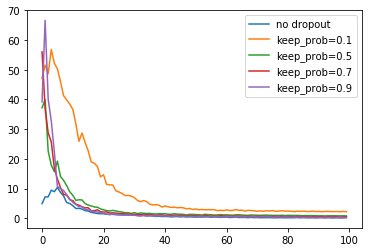

In [12]:
plt.plot(loss_no_dropout, label="no dropout")
plt.plot(loss_dropout_1, label="keep_prob=0.1")
plt.plot(loss_dropout_5, label="keep_prob=0.5")
plt.plot(loss_dropout_7, label="keep_prob=0.7")
plt.plot(loss_dropout_9, label="keep_prob=0.9")
plt.legend()
plt.show()

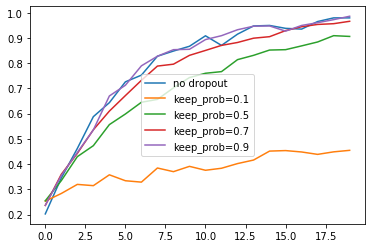

In [13]:
plt.plot(train_acc_no_dropout, label="no dropout")
plt.plot(train_acc_dropout_1, label="keep_prob=0.1")
plt.plot(train_acc_dropout_5, label="keep_prob=0.5")
plt.plot(train_acc_dropout_7, label="keep_prob=0.7")
plt.plot(train_acc_dropout_9, label="keep_prob=0.9")
plt.legend()
plt.show()

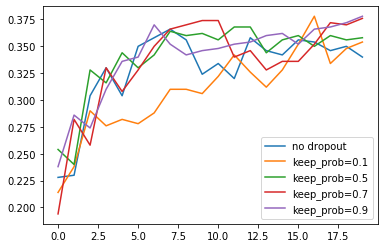

In [14]:
plt.plot(val_acc_no_dropout, label="no dropout")
plt.plot(val_acc_dropout_1, label="keep_prob=0.1")
plt.plot(val_acc_dropout_5, label="keep_prob=0.5")
plt.plot(val_acc_dropout_7, label="keep_prob=0.7")
plt.plot(val_acc_dropout_9, label="keep_prob=0.9")
plt.legend()
plt.show()

In [15]:
from utils.reg_funcs import bn_forward
from utils.reg_funcs import bn_backward

np.random.seed(4041)
N, D, H1, H2 = 200, 10, 5, 3
x_in = np.random.randn(N, D)
w1 = np.random.randn(D,H1)
w2 = np.random.randn(H1,H2)
a2 = np.maximum(x_in.dot(w1),0).dot(w2)

# Before batch normalization
print("mean of a2: ", np.mean(a2, axis=0))
print("var of a2: ", np.var(a2, axis=0))

bn_config = {"epsilon":1e-5, "decay":0.9}
gamma = np.ones(H2)
beta = np.zeros(H2)
a2_bn, _ = bn_forward(a2, gamma, beta, bn_config, "train")
print("(train) mean of a2_bn: ", np.mean(a2_bn, axis=0))
print("(train) var of a2_bn: ", np.var(a2_bn, axis=0))

mean of a2:  [ 1.30614901  5.92062846 -3.22121602]
var of a2:  [ 6.82372265 40.8015143   9.77739076]
(train) mean of a2_bn:  [-2.97262215e-16 -4.14113188e-16 -1.58623115e-16]
(train) var of a2_bn:  [0.99999853 0.99999975 0.99999898]


In [16]:
bn_config = {"epsilon":1e-5, "decay":0.9}
gamma = np.ones(H2)
beta = np.zeros(H2)

collect_data = a2
for _ in range(100):
    x_in = np.random.randn(N, D)
    a2 = np.maximum(x_in.dot(w1),0).dot(w2)
    collect_data = np.concatenate((collect_data, a2), axis=0)
    bn_forward(a2, gamma, beta, bn_config, "train")

# Compare moving_mean and moving_var with real mean and var.
print("real mean of data: ", np.mean(collect_data, axis=0))
print("(real var of data: ", np.var(collect_data, axis=0))
print("moving mean of data: ", bn_config["moving_mean"])
print("(moving var of data: ", bn_config["moving_var"])

x_in = np.random.randn(N, D)
a2 = np.maximum(x_in.dot(w1),0).dot(w2)

print("*"*80)
print("mean of a2: ", np.mean(a2, axis=0))
print("var of a2: ", np.var(a2, axis=0))

a2_bn, _ = bn_forward(a2, gamma, beta, bn_config, "test")

print("(test) mean of a2_bn: ", np.mean(a2_bn, axis=0))
print("(test) var of a2_bn: ", np.var(a2_bn, axis=0))

real mean of data:  [ 0.98787625  5.15537852 -3.17395627]
(real var of data:  [ 5.52632903 33.50179753  8.69746352]
moving mean of data:  [ 1.00212034  5.17647793 -3.15367683]
(moving var of data:  [ 5.58824353 34.13057973  8.74946176]
********************************************************************************
mean of a2:  [ 1.08884721  4.92968194 -3.10726945]
var of a2:  [ 4.97160606 38.72623056  8.64775578]
(test) mean of a2_bn:  [ 0.03668729 -0.04224411  0.01568903]
(test) var of a2_bn:  [0.88965292 1.13464874 0.98837461]


In [37]:
x_in = np.random.randn(N, D)
a2 = np.maximum(x_in.dot(w1),0).dot(w2)
da2_bn = np.ones_like(a2)

gamma = np.ones(H2)
beta = np.zeros(H2)
a2_bn, cache = bn_forward(a2, gamma, beta, bn_config, "test")
da2, dgamma, dbeta = bn_backward(da2_bn, cache)

a2_tf = tf.Variable(a2)
eps = bn_config["epsilon"]
mean_tf = bn_config["moving_mean"]
var_tf = bn_config["moving_var"]
gamma_tf = tf.Variable(gamma)
beta_tf = tf.Variable(beta)
a2_bn_tf = tf.nn.batch_normalization(a2_tf, mean_tf, var_tf, beta_tf, gamma_tf, eps)

da2_tf = tf.gradients(a2_bn_tf, a2_tf)
dgamma_tf = tf.gradients(a2_bn_tf, gamma_tf)
dbeta_tf = tf.gradients(a2_bn_tf, beta_tf)

init = tf.global_variables_initializer()
tf_output = (a2_bn_tf, da2_tf[0], dgamma_tf[0], dbeta_tf[0])
with tf.Session() as sess:
    sess.run(init)
    a2_bn_check, da2_check, dgamma_check, dbeta_check = sess.run(tf_output)
    
# Make comparison
print("Is a2_bn correct? {}".format(np.allclose(a2_bn, a2_bn_check)))
print("Is da2 correct? {}".format(np.allclose(da2, da2_check)))
print("Is dgamma correct? {}".format(np.allclose(dgamma, dgamma_check)))
print("Is dbeta correct? {}".format(np.allclose(dbeta, dbeta_check)))

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

**Experiment on shallow MLP** 

In [29]:
use_bn = False
model = MLP(input_dim=3072, hidden_dims=[100], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, use_bn=use_bn)
optimizer = AdamOptim(model)
# hist_no_dropout contains loss, train acc and valid acc history.
hist_shallow_no_bn = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=50, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.21, new learning rate = 0.00095
epoch 2: valid acc = 0.282, new learning rate = 0.0009025
epoch 3: valid acc = 0.328, new learning rate = 0.000857375
epoch 4: valid acc = 0.34, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.326, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.34, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.34, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.324, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.318, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.318, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.324, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.33, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.336, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.344, new learning rate = 0.00048767497911552944
epoch 15: valid acc =

In [30]:
# Build a two-layer netowrk with batch normalization. Remember to "use_bn".
use_bn = True
model = MLP(input_dim=3072, hidden_dims=[100], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, use_bn=use_bn)
optimizer = AdamOptim(model)
# hist_no_dropout contains loss, train acc and valid acc history.
hist_shallow_bn = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=50, batch_size=100, learning_rate=1e-3, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

NameError: name 'hist_shallow_bn' is not defined

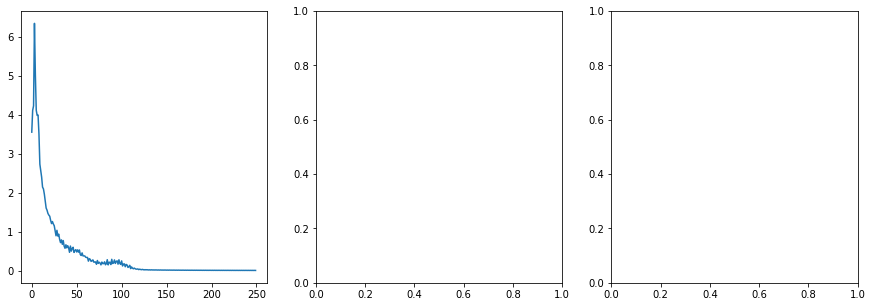

In [31]:
# Plot both results together and make a comparison. 
title_name = ["loss", "train acc", "val acc"]
_, axarr = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    axarr[i].plot(hist_shallow_no_bn[i], label="no_bn")
    axarr[i].plot(hist_shallow_bn[i], label="bn")
    axarr[i].legend(), axarr[i].set_title(title_name[i])
plt.show()

**Experiment on deep MLP**

In [32]:
use_bn = False

model = MLP(input_dim=3072, hidden_dims=[100, 50, 50, 50], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, use_bn=use_bn)

optimizer = AdamOptim(model)

hist_deep_no_bn = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=50, batch_size=100, learning_rate=2e-4, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20
epoch 1: valid acc = 0.172, new learning rate = 0.00019
epoch 2: valid acc = 0.178, new learning rate = 0.0001805
epoch 3: valid acc = 0.18, new learning rate = 0.00017147499999999998
epoch 4: valid acc = 0.174, new learning rate = 0.00016290124999999997
epoch 5: valid acc = 0.176, new learning rate = 0.00015475618749999996
epoch 6: valid acc = 0.178, new learning rate = 0.00014701837812499996
epoch 7: valid acc = 0.178, new learning rate = 0.00013966745921874994
epoch 8: valid acc = 0.178, new learning rate = 0.00013268408625781244
epoch 9: valid acc = 0.176, new learning rate = 0.0001260498819449218
epoch 10: valid acc = 0.176, new learning rate = 0.00011974738784767572
epoch 11: valid acc = 0.176, new learning rate = 0.00011376001845529192
epoch 12: valid acc = 0.174, new learning rate = 0.00010807201753252733
epoch 13: valid acc = 0.172, new learning rate = 0.00010266841665590096
epoch 14: valid acc = 0.172, new learning rate = 9.75349958231059e-0

In [33]:
use_bn = True

model = MLP(input_dim=3072, hidden_dims=[100, 50, 50, 50], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, use_bn=use_bn)

optimizer = AdamOptim(model)

hist_deep_bn = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=50, batch_size=100, learning_rate=2e-4, learning_decay=0.95, 
                           verbose=False, record_interval = 4)

number of batches for training: 20


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

NameError: name 'hist_deep_bn' is not defined

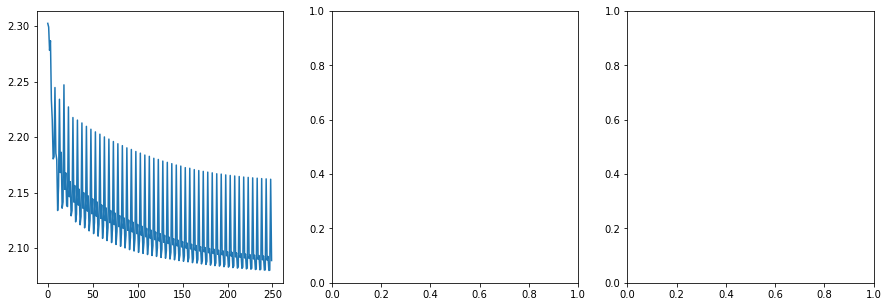

In [34]:
# Plot both results together and make a comparison. 
title_name = ["loss", "train acc", "val acc"]

_, axarr = plt.subplots(1,3, figsize=(15,5))

for i in range(3):
    axarr[i].plot(hist_deep_no_bn[i], label="no_bn")
    axarr[i].plot(hist_deep_bn[i], label="bn")
    axarr[i].legend(), axarr[i].set_title(title_name[i])
plt.show()

In [35]:
dropout_config = {"enabled":True, "keep_prob": 0.7}

use_bn = True

model = MLP(input_dim=3072, hidden_dims=[100, 50], num_classes=10, 
            weight_scale=1e-3, l2_reg=0.0, dropout_config=dropout_config, use_bn=use_bn)

optimizer = AdamOptim(model)

hist_deep_bn = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=50, batch_size=200, learning_rate=1e-3, learning_decay=1.0, 
                           verbose=False, record_interval = 4)

number of batches for training: 10


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

## Reference
* Weight Normalization: A Simple Reparameterization to Accelerate Training of Deep Neural Networks https://arxiv.org/abs/1602.07868
* Highway netowrk https://arxiv.org/pdf/1505.00387.pdf